<a href="https://colab.research.google.com/github/punsatya04/Satya_INFO4670_Spring2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Write your code here

from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

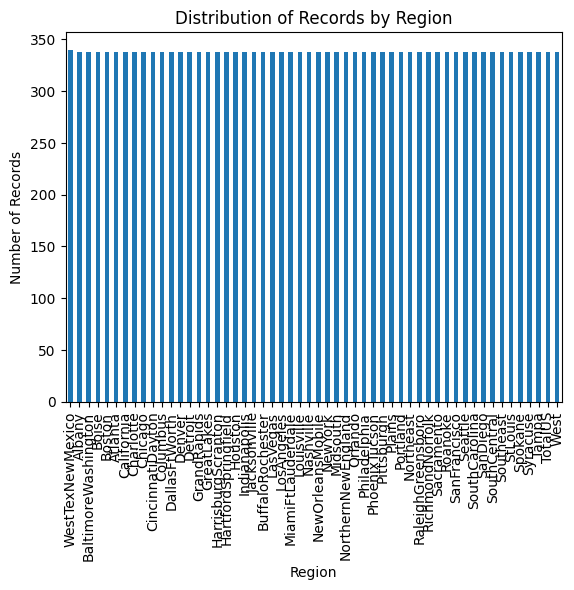

Top 10 Regions by Record Count:
region
WestTexNewMexico       340
Albany                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
Atlanta                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Name: count, dtype: int64


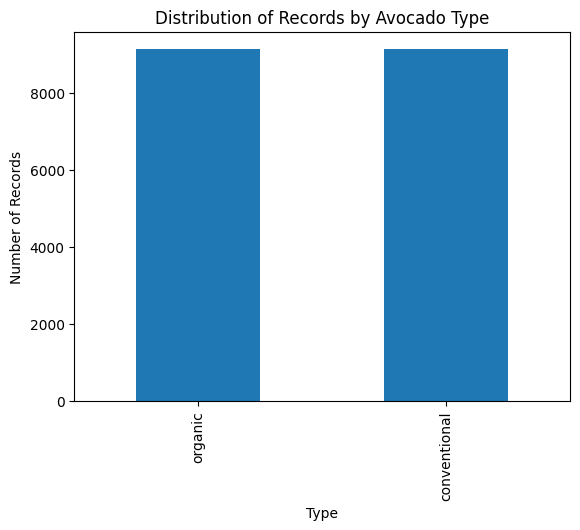


Distribution by Type:
type
organic         9127
conventional    9126
Name: count, dtype: int64


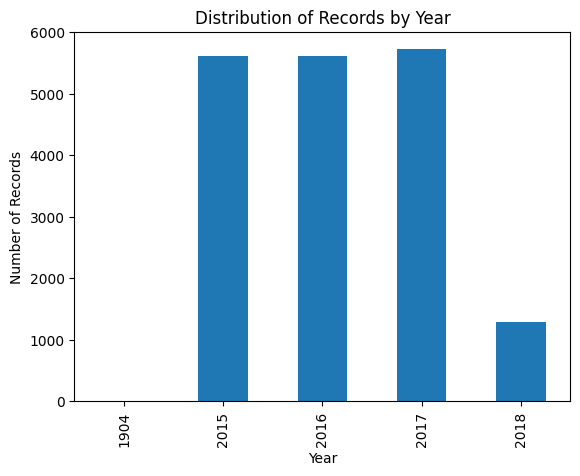


Distribution by Year:
year
1904       1
2015    5615
2016    5616
2017    5722
2018    1300
Name: count, dtype: int64


In [ ]:
# Write your code here
# Counts by category
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Assignment 2 dataset.csv")

# Drop unnecessary index column
df = df.drop(columns=["Column 1"], errors="ignore")

# -------------------------------
# Distribution by Region
# -------------------------------
region_counts = df["region"].value_counts()

plt.figure()
region_counts.plot(kind="bar")
plt.title("Distribution of Records by Region")
plt.xlabel("Region")
plt.ylabel("Number of Records")
plt.show()

print("Top 10 Regions by Record Count:")
print(region_counts.head(10))

# Distribution by Type

type_counts = df["type"].value_counts()

plt.figure()
type_counts.plot(kind="bar")
plt.title("Distribution of Records by Avocado Type")
plt.xlabel("Type")
plt.ylabel("Number of Records")
plt.show()

print("\nDistribution by Type:")
print(type_counts)

# Distribution by Year

year_counts = df["year"].value_counts().sort_index()

plt.figure()
year_counts.plot(kind="bar")
plt.title("Distribution of Records by Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.show()

print("\nDistribution by Year:")
print(year_counts)


1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [ ]:
# Write your code here
# --- Duplicate rows ---
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

# --- Missing values per column ---
missing_per_col = df.isna().sum().sort_values(ascending=False)
print("\nMissing values per column:")
display(missing_per_col.to_frame("missing_values"))


Number of duplicate rows: 2

Missing values per column:


,missing_values
4046,2
Small Bags,2
Large Bags,2
4225,1
Total Volume,1
XLarge Bags,1
type,1
Total Bags,1
4770,1
AveragePrice,0


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here
print("Rows, Columns =", df.shape)



Rows, Columns = (18254, 13)


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
# Write your code here
# 2.1 Remove first column / 'Column 1'
if "Column 1" in df.columns:
    df = df.drop(columns=["Column 1"])

# Treat 'year' as nominal (categorical) instead of numeric
df["year"] = df["year"].astype(str)

display(df.head())
print("Updated columns:", list(df.columns))
print("Dtypes:")
display(df.dtypes)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Updated columns: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
Dtypes:


,0
Date,object
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64
XLarge Bags,float64


2.2 Check for duplicate values and remove them.

In [ ]:
# Write your code here
# 2.2 Remove duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Removed {before - after} duplicate rows. New shape: {df.shape}")

Removed 2 duplicate rows. New shape: (18252, 13)


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:
# Write your code here
# 2.3 Missing values handling
# Rule:
# - If MOST values in a row are missing -> drop that row (here: > 50% of columns missing)
# - Otherwise -> impute missing numeric values using the MEDIAN of that column within the same region

# Compute missingness per row
row_missing = df.isna().sum(axis=1)
threshold = df.shape[1] / 2  # "most columns missing" => more than half
to_drop = row_missing > threshold
print("Rows to drop (too many missing values):", int(to_drop.sum()))

df = df.loc[~to_drop].copy()

# Parse Date to datetime to make later analysis correct (safe preprocessing)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Impute numeric columns by region median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# (year was converted to string already, so it won't be included here)
for col in numeric_cols:
    df[col] = df.groupby("region")[col].transform(lambda s: s.fillna(s.median()))

# For categorical columns, use region mode (most frequent) as a reasonable default
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    df[col] = df.groupby("region")[col].transform(
        lambda s: s.fillna(s.mode().iloc[0] if not s.mode().empty else s.dropna().iloc[0] if s.dropna().size else "Unknown")
    )

print("Remaining missing values per column:")
display(df.isna().sum().to_frame("missing"))
print("Cleaned shape:", df.shape)


Rows to drop (too many missing values): 1
Remaining missing values per column:


,missing
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


Cleaned shape: (18251, 13)


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


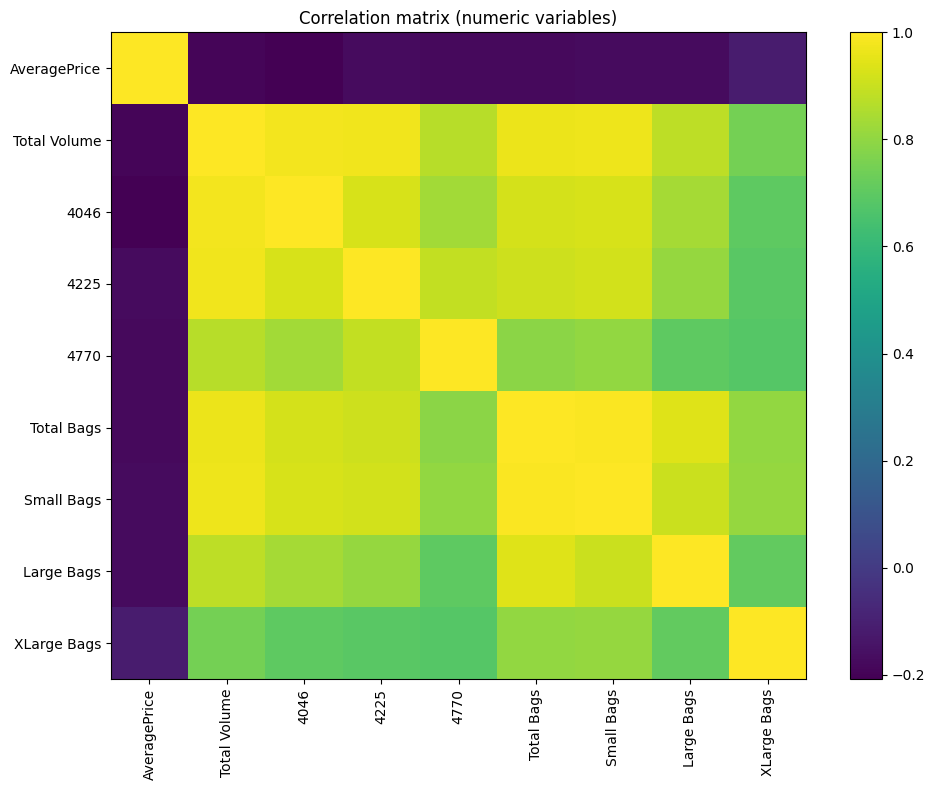

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192767,-0.208325,-0.172944,-0.179458,-0.177103,-0.174742,-0.172953,-0.117604
Total Volume,-0.192767,1.000000,0.977863,0.974181,0.872203,0.963047,0.967238,0.880640,0.747158
4046,-0.208325,0.977863,1.000000,0.926110,0.833390,0.920057,0.925280,0.838646,0.699378
4225,-0.172944,0.974181,0.926110,1.000000,0.887856,0.905788,0.916032,0.810016,0.688810
4770,-0.179458,0.872203,0.833390,0.887856,1.000000,0.792315,0.802734,0.698473,0.679862
Total Bags,-0.177103,0.963047,0.920057,0.905788,0.792315,1.000000,0.994334,0.943009,0.804233
Small Bags,-0.174742,0.967238,0.925280,0.916032,0.802734,0.994334,1.000000,0.902589,0.806845
Large Bags,-0.172953,0.880640,0.838646,0.810016,0.698473,0.943009,0.902589,1.000000,0.710860
XLarge Bags,-0.117604,0.747158,0.699378,0.688810,0.679862,0.804233,0.806845,0.710860,1.000000


In [ ]:
# Write your code here
# 2.4 Correlation between variables (numeric features only)
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix (numeric variables)")
plt.colorbar()
plt.tight_layout()
plt.show()

display(corr)

# Comment:

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

,min,max,mean,median
AveragePrice,0.44,3.25,1.406020,1.37
Total Volume,84.56,62505646.52,850552.312103,107354.25
4046,0.00,22743616.17,292983.953737,8645.30
4225,0.00,20470572.61,295122.546831,29056.73
4770,0.00,2546439.11,22837.273030,184.99
Total Bags,0.00,19373134.37,239613.964021,39738.53
Small Bags,0.00,13384586.80,182178.418161,26362.82
Large Bags,0.00,5719096.61,54332.331965,2647.71
XLarge Bags,0.00,551693.65,3106.086096,0.00


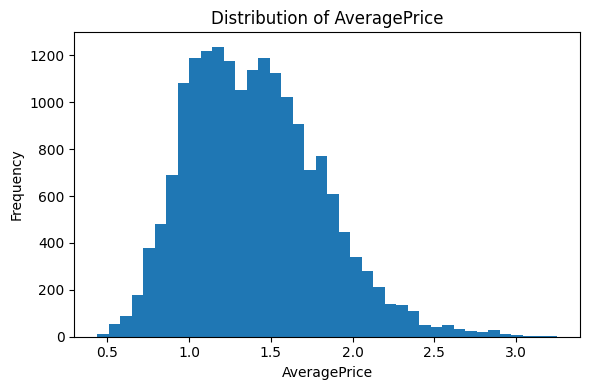

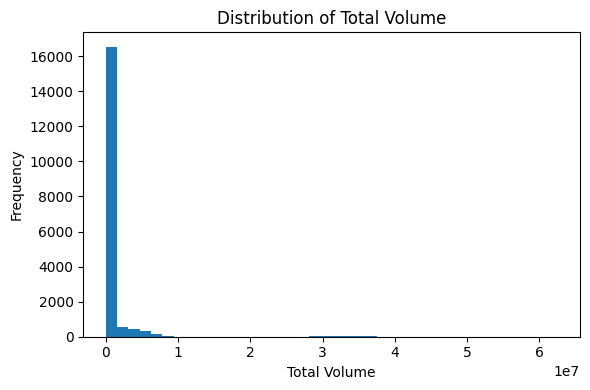

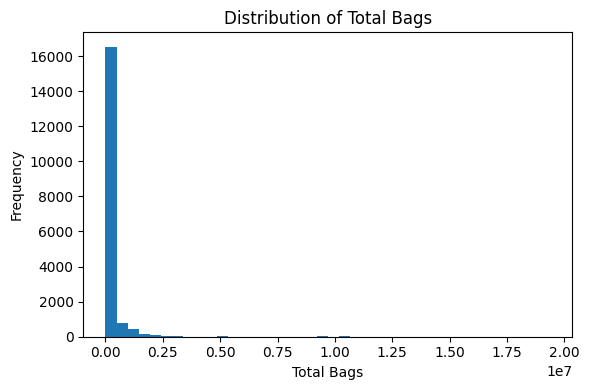


type - unique values (2):


,0
0,conventional
1,organic



year - unique values (5):


,0
0,1904
1,2015
2,2016
3,2017
4,2018



region - unique values (54):


,0
0,Albany
1,Atlanta
2,BaltimoreWashington
3,Boise
4,Boston
5,BuffaloRochester
6,California
7,Charlotte
8,Chicago
9,CincinnatiDayton


... (showing first 50)


In [ ]:
# Write your code here
# 3.1 Describe variables

# Continuous (numeric) summary: min, max, mean, median
numeric_cols = df.select_dtypes(include=[np.number]).columns
summary = pd.DataFrame({
    "min": df[numeric_cols].min(),
    "max": df[numeric_cols].max(),
    "mean": df[numeric_cols].mean(),
    "median": df[numeric_cols].median()
})
display(summary)

# Distributions (a few key continuous variables)
for col in ["AveragePrice", "Total Volume", "Total Bags"]:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[col].dropna(), bins=40)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# Categorical unique values
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"\n{col} - unique values ({df[col].nunique()}):")
    display(pd.Series(sorted(df[col].dropna().unique())).head(50))
    if df[col].nunique() > 50:
        print("... (showing first 50)")


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [ ]:
# Write your code here
# 3.2 Earliest recorded date
earliest_date = df["Date"].min()
latest_date = df["Date"].max()
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

# Check if there are records from earliest date up to 2010
cutoff = pd.Timestamp("2010-12-31")
has_data_to_2010 = (df["Date"] <= cutoff).any()
print("Any records on/before 2010-12-31?", bool(has_data_to_2010))

# Inspect earliest few rows
display(df.sort_values("Date").head(10))


Earliest Date: 1904-01-21 00:00:00
Latest Date: 2018-03-25 00:00:00
Any records on/before 2010-12-31? True


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18250,1904-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,1904,WestTexNewMexico
9905,2015-01-04,1.60,1012.61,23.59,772.85,0.00,216.17,210.00,6.17,0.0,organic,2015,GrandRapids
1143,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.0,conventional,2015,LasVegas
2651,2015-01-04,0.97,339909.13,226346.70,37517.53,53.15,75991.75,33447.51,42544.24,0.0,conventional,2015,Tampa
207,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
103,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
10113,2015-01-04,1.22,8938.32,7009.77,671.88,0.00,1256.67,1256.67,0.00,0.0,organic,2015,Houston
2599,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.0,conventional,2015,Syracuse
10165,2015-01-04,1.63,1780.60,76.89,874.32,0.00,829.39,542.89,286.50,0.0,organic,2015,Indianapolis
2547,2015-01-04,1.15,198735.26,125713.89,34555.73,53.54,38412.10,38400.99,11.11,0.0,conventional,2015,StLouis


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# 3.3 Highest average price
idx = df["AveragePrice"].idxmax()
row = df.loc[idx]

print("Highest AveragePrice:", row["AveragePrice"])
print("Region:", row["region"])
print("Date:", row["Date"])
print("Type:", row.get("type", None))
display(row)



Highest AveragePrice: 3.25
Region: SanFrancisco
Date: 2016-10-30 00:00:00
Type: organic


,14125
Date,2016-10-30 00:00:00
AveragePrice,3.25
Total Volume,16700.94
4046,2325.93
4225,11142.85
4770,0.0
Total Bags,3232.16
Small Bags,3232.16
Large Bags,0.0
XLarge Bags,0.0


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# 3.4 Highest total volume
idx = df["Total Volume"].idxmax()
row = df.loc[idx]

print("Highest Total Volume:", row["Total Volume"])
print("Region:", row["region"])
print("Date:", row["Date"])
print("Type:", row.get("type", None))
display(row)


Highest Total Volume: 62505646.52
Region: TotalUS
Date: 2018-02-04 00:00:00
Type: conventional


,9097
Date,2018-02-04 00:00:00
AveragePrice,0.87
Total Volume,62505646.52
4046,21620180.9
4225,20445501.03
4770,1066830.22
Total Bags,19373134.37
Small Bags,13384586.8
Large Bags,5719096.61
XLarge Bags,269450.96
